In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

![S&P's 500](https://www.thestreet.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cq_auto:good%2Cw_1200/MTg4MjU0NjUxODAyNzIzMzc2/sp-500-1.png)

<font size="3">``
- **O que é**: Índice de mercado que mede o desempenho de 500 grandes empresas dos EUA.
- **Composição**: Inclui empresas listadas nas bolsas NYSE e NASDAQ.
- **Origem**: Criado pela Standard & Poor's.
- **Critérios de seleção**: Capitalização de mercado, liquidez e representatividade no mercado.
- **Setores**: Empresas de vários setores, como tecnologia, saúde, finanças e energia.
- **Importância**: Principal indicador da saúde do mercado de ações americano.
- **Uso**: Referência para investidores, analistas e gestores de fundos.``<font size>

In [30]:
df = pd.read_csv(r'C:\Users\Matheus\Desktop\Ada - Pandas\S-P500-exploratory-financial-anallysis\sp500_companies.csv', delimiter=',')
df1 = pd.read_csv(r'C:\Users\Matheus\Desktop\Pandas - Final\S-P500-exploratory-financial-anallysis\sp500_index.csv')
df2 = pd.read_csv(r'C:\Users\Matheus\Desktop\Pandas - Final\S-P500-exploratory-financial-anallysis\sp500_stocks.csv')

In [19]:
# Verificando as colunas
df.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

| Coluna | Features | Descrição |
|:---|:---|:---|
| 0 | Exchange | Bolsa onde as ações são negociadas |
| 1 | Symbol | Simbolo das ações |
| 2 | Shortname | Nome Abreviado da Empresa |
| 3 | Longname | Nome completo da empresa |
| 4 | Sector |Setor onde a empresa atua|
| 5 | Industry | Ramo de atuação |
| 6 | Currentprice | Preço atual das ações |
| 7 | Marketcap | Capitalização de mercado (Valor de mercado = Preço da Ação x Número total de ações) |
| 8 | Ebitda | Métrica financeira que representa o lucro de uma empresa antes de descontar os juros, impostos, depreciação e amortização $EBITDA\: = \:Lucro Operacional + Depreciação +  Amortização$ |
| 9 | Revenuegrowth | aumento percentual da receita $\dfrac {Receita\:no\:Período\:Atual - Receita\:no \:Período\:Anterior}{Receita\:no\:Período\:Anterior}$ |
| 10 | City | Cidade Matriz |
| 11 | State | Estado da Matriz |
| 12 | Country | País da Matriz |
| 13 | Fulltimeemployees | Número de Funcionários em tempo integral |
| 14 | Longbusinesssummary | Resumo da Empresa |
| 15 | Weight | Proporção do valor de mercado de uma empresa em relação ao valor de mercado total do índice S&P 500 |


In [20]:
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,229.00,3481738936320,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.066419
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,417.14,3100618260480,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.059148
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,119.37,2928146120704,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.055858
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,163.38,2021272190976,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.038558
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,165.11,2020401479680,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.038542


In [21]:
df.shape

(503, 16)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        501 non-null    float64
 10  City                 503 non-null    object 
 11  State                484 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    495 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [23]:
# Verificação de valores nulos
porcentagem_nulos = (df.isnull().sum() / df.shape[0])*100
porcentagem_nulos

Exchange               0.000000
Symbol                 0.000000
Shortname              0.000000
Longname               0.000000
Sector                 0.000000
Industry               0.000000
Currentprice           0.000000
Marketcap              0.000000
Ebitda                 5.765408
Revenuegrowth          0.397614
City                   0.000000
State                  3.777336
Country                0.000000
Fulltimeemployees      1.590457
Longbusinesssummary    0.000000
Weight                 0.000000
dtype: float64

In [24]:
# Estatistica descritivas (Tentar melhorar as escalas)
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,503.000000,5.030000e+02,4.740000e+02,501.000000,4.950000e+02,503.000000
mean,221.523181,1.042169e+11,6.793094e+09,0.057595,5.815373e+04,0.001988
std,498.713125,3.055524e+11,1.485538e+10,0.142049,1.394497e+05,0.005829
min,7.840000,6.321688e+09,-4.107000e+09,-0.573000,2.800000e+01,0.000121
25%,68.250000,1.930082e+10,1.585225e+09,-0.001000,1.007550e+04,0.000368
50%,123.290000,3.605402e+10,2.880500e+09,0.047000,2.124900e+04,0.000688
75%,236.945000,7.665864e+10,5.874562e+09,0.096000,5.354100e+04,0.001462
max,9172.460000,3.481739e+12,1.317810e+11,1.430000,2.100000e+06,0.066419


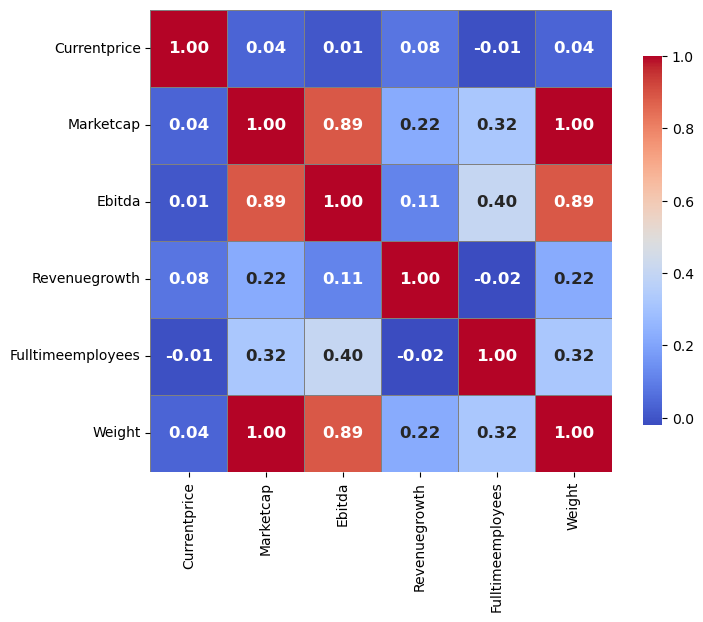

In [26]:
# Correlação 
colunas = ['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']
df_correlation = df[colunas]

# Calculando a correlação
correlacao = df_correlation.corr()

plt.figure(figsize = (8,6))
sns.heatmap(
    correlacao, 
    annot=True,                # Mostra os valores de correlação
    fmt=".2f",                
    cmap='coolwarm',           
    cbar_kws={'shrink': .8},   # Tamanho da barra de cores
    linewidths=0.5,            # Espessura das linhas entre as células
    linecolor='gray',          
    annot_kws={"size": 12, "weight": 'bold'}, 
    square=True                
)

plt.show()

Correlações fortes e positivas:

- Ebitida e Wight (Proporção do valor de mercado) - Ambos tendem a crescer juntos
- Ebitida e Marketcap (Valor total de mercado de uma empresa) - Ambos tendem a crescer juntos 